In [128]:
#data from https://www.kaggle.com/omercolakoglu/turkey-covid-19-vaccination-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#import the data
df = pd.read_excel("covid19Vaccination.xlsx", error_bad_lines=False)
df.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025


In [12]:
df.tail()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
76,438178,2021-06-26 22:41:31,5412,Uşak,Usak,169159,81055,250214,369433,6,0,6,438097
77,438179,2021-06-26 22:41:31,5412,Van,Van,236641,91208,327849,1149342,5,0,5,438098
78,438180,2021-06-26 22:41:31,5412,Yalova,Yalova,129888,65920,195808,276050,2,0,2,438099
79,438181,2021-06-26 22:41:31,5412,Yozgat,Yozgat,151825,81924,233749,419095,1,0,1,438100
80,438182,2021-06-26 22:41:31,5412,Zonguldak,Zonguldak,275433,139382,414815,591204,6,0,6,438101


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          81 non-null     int64         
 1   DATE_       81 non-null     datetime64[ns]
 2   SEQID       81 non-null     int64         
 3   CITY        81 non-null     object        
 4   CITY2       81 non-null     object        
 5   _1DOSE      81 non-null     int64         
 6   _2DOSE      81 non-null     int64         
 7   _TOTAL      81 non-null     int64         
 8   POPULATION  81 non-null     int64         
 9   DIFF_1DOSE  81 non-null     int64         
 10  DIFF_2DOSE  81 non-null     int64         
 11  DIFF_TOTAL  81 non-null     int64         
 12  PREVID      81 non-null     int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 8.4+ KB


In [8]:
df.describe()

,ID,SEQID,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
count,81.000000,81.0,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.000000,81.000000,81.000000,81.000000
mean,438142.000000,5412.0,3.965429e+05,1.828914e+05,5.794343e+05,1.032276e+06,8.407407,0.493827,8.901235,438061.000000
std,23.526581,0.0,7.727379e+05,3.171276e+05,1.088717e+06,1.872576e+06,24.283110,1.574194,25.764610,23.526581
min,438102.000000,5412.0,2.412800e+04,1.315500e+04,3.728300e+04,8.191000e+04,0.000000,0.000000,0.000000,438021.000000
25%,438122.000000,5412.0,1.069900e+05,4.914500e+04,1.575450e+05,2.849230e+05,0.000000,0.000000,0.000000,438041.000000
50%,438142.000000,5412.0,1.976310e+05,9.889600e+04,2.940100e+05,5.377620e+05,1.000000,0.000000,1.000000,438061.000000
75%,438162.000000,5412.0,3.955820e+05,1.871380e+05,5.805240e+05,1.081065e+06,6.000000,0.000000,6.000000,438081.000000
max,438182.000000,5412.0,6.197550e+06,2.419591e+06,8.617141e+06,1.546245e+07,193.000000,11.000000,204.000000,438101.000000


In [9]:
print(df)

        ID               DATE_  SEQID            CITY      CITY2  _1DOSE  \
0   438102 2021-06-26 22:41:31   5412           Adana      Adana  784464   
1   438103 2021-06-26 22:41:31   5412        Adıyaman   Adiyaman  170847   
2   438104 2021-06-26 22:41:31   5412  Afyonkarahisar      Afyon  292611   
3   438105 2021-06-26 22:41:31   5412            Ağrı       Agri   94807   
4   438106 2021-06-26 22:41:31   5412         Aksaray    Aksaray  131889   
..     ...                 ...    ...             ...        ...     ...   
76  438178 2021-06-26 22:41:31   5412            Uşak       Usak  169159   
77  438179 2021-06-26 22:41:31   5412             Van        Van  236641   
78  438180 2021-06-26 22:41:31   5412          Yalova     Yalova  129888   
79  438181 2021-06-26 22:41:31   5412          Yozgat     Yozgat  151825   
80  438182 2021-06-26 22:41:31   5412       Zonguldak  Zonguldak  275433   

    _2DOSE   _TOTAL  POPULATION  DIFF_1DOSE  DIFF_2DOSE  DIFF_TOTAL  PREVID  
0   35540

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
len(df)

81

In [13]:
df.columns

Index(['ID', 'DATE_', 'SEQID', 'CITY', 'CITY2', '_1DOSE', '_2DOSE', '_TOTAL',
       'POPULATION', 'DIFF_1DOSE', 'DIFF_2DOSE', 'DIFF_TOTAL', 'PREVID'],
      dtype='object')

## Selecting Columns

In [18]:
df["ID"].nunique() #no duplicate IDs

81

In [17]:
df["SEQID"].unique() # only 1 sequence ID

array([5412], dtype=int64)

In [20]:
df[["ID", "SEQID"]] #ID from 438102 to 438182

,ID,SEQID
0,438102,5412
1,438103,5412
2,438104,5412
3,438105,5412
4,438106,5412
...,...,...
76,438178,5412
77,438179,5412
78,438180,5412
79,438181,5412


In [21]:
df[["_1DOSE", "_2DOSE"]]

,_1DOSE,_2DOSE
0,784464,355404
1,170847,77955
2,292611,138934
3,94807,41146
4,131889,62603
...,...,...
76,169159,81055
77,236641,91208
78,129888,65920
79,151825,81924


In [22]:
df[["_TOTAL","POPULATION"]] 

,_TOTAL,POPULATION
0,1139868,2258718
1,248802,632459
2,431545,736912
3,135953,535435
4,194492,423011
...,...,...
76,250214,369433
77,327849,1149342
78,195808,276050
79,233749,419095


### Position-based Indexing and Slicing with iloc[]

In [23]:
df

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,438178,2021-06-26 22:41:31,5412,Uşak,Usak,169159,81055,250214,369433,6,0,6,438097
77,438179,2021-06-26 22:41:31,5412,Van,Van,236641,91208,327849,1149342,5,0,5,438098
78,438180,2021-06-26 22:41:31,5412,Yalova,Yalova,129888,65920,195808,276050,2,0,2,438099
79,438181,2021-06-26 22:41:31,5412,Yozgat,Yozgat,151825,81924,233749,419095,1,0,1,438100


In [24]:
df.iloc[0]

ID                         438102
DATE_         2021-06-26 22:41:31
SEQID                        5412
CITY                        Adana
CITY2                       Adana
_1DOSE                     784464
_2DOSE                     355404
_TOTAL                    1139868
POPULATION                2258718
DIFF_1DOSE                     15
DIFF_2DOSE                      0
DIFF_TOTAL                     15
PREVID                     438021
Name: 0, dtype: object

In [29]:
df.iloc[1,1]

Timestamp('2021-06-26 22:41:31')

In [30]:
df.iloc[[1, 2, 3]]

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024


In [31]:
df.iloc[1:4]

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024


In [32]:
df.iloc[-5:]

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
76,438178,2021-06-26 22:41:31,5412,Uşak,Usak,169159,81055,250214,369433,6,0,6,438097
77,438179,2021-06-26 22:41:31,5412,Van,Van,236641,91208,327849,1149342,5,0,5,438098
78,438180,2021-06-26 22:41:31,5412,Yalova,Yalova,129888,65920,195808,276050,2,0,2,438099
79,438181,2021-06-26 22:41:31,5412,Yozgat,Yozgat,151825,81924,233749,419095,1,0,1,438100
80,438182,2021-06-26 22:41:31,5412,Zonguldak,Zonguldak,275433,139382,414815,591204,6,0,6,438101


#### Indexing/Slicing Rows and Columns with loc[]

In [44]:
df.loc[:]

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,438178,2021-06-26 22:41:31,5412,Uşak,Usak,169159,81055,250214,369433,6,0,6,438097
77,438179,2021-06-26 22:41:31,5412,Van,Van,236641,91208,327849,1149342,5,0,5,438098
78,438180,2021-06-26 22:41:31,5412,Yalova,Yalova,129888,65920,195808,276050,2,0,2,438099
79,438181,2021-06-26 22:41:31,5412,Yozgat,Yozgat,151825,81924,233749,419095,1,0,1,438100


In [37]:
df.loc[:, ["CITY", "CITY2"]]

,CITY,CITY2
0,Adana,Adana
1,Adıyaman,Adiyaman
2,Afyonkarahisar,Afyon
3,Ağrı,Agri
4,Aksaray,Aksaray
...,...,...
76,Uşak,Usak
77,Van,Van
78,Yalova,Yalova
79,Yozgat,Yozgat


### First Steps with Pandas Series

In [45]:
city = df["CITY"]

In [46]:
city

0              Adana
1           Adıyaman
2     Afyonkarahisar
3               Ağrı
4            Aksaray
           ...      
76              Uşak
77               Van
78            Yalova
79            Yozgat
80         Zonguldak
Name: CITY, Length: 81, dtype: object

###  Analyzing Numerical Series

In [47]:
df

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,438178,2021-06-26 22:41:31,5412,Uşak,Usak,169159,81055,250214,369433,6,0,6,438097
77,438179,2021-06-26 22:41:31,5412,Van,Van,236641,91208,327849,1149342,5,0,5,438098
78,438180,2021-06-26 22:41:31,5412,Yalova,Yalova,129888,65920,195808,276050,2,0,2,438099
79,438181,2021-06-26 22:41:31,5412,Yozgat,Yozgat,151825,81924,233749,419095,1,0,1,438100


In [48]:
d1 = df["_1DOSE"]
d1

0     784464
1     170847
2     292611
3      94807
4     131889
       ...  
76    169159
77    236641
78    129888
79    151825
80    275433
Name: _1DOSE, Length: 81, dtype: int64

In [49]:
d1.unique()

array([ 784464,  170847,  292611,   94807,  131889,  169285, 2652085,
       1055350,   34629,   80554,  555807,  661424,   96816,  108989,
         24128,  108385,   57366,   51093,  151636,  128036, 1272038,
        298662,   81521,  238440,  475605,  307868,  158046,  226150,
        191848,   91827,  212225,  457620,  570536,  210905,   41380,
         47078,  512074,   43627,  205991, 6197550, 2136705,  336185,
        107924,   96204,   81829,  175799,  534876,  114702,  197631,
        106990,   43872,  793994,  757561,  254612,  290096,  637609,
        124235,  730833,  578641,   62187,  122431,  123623,  352377,
        198547,  145810,  395582,  562448,   45367,  104450,  245140,
        266534,   70624,  477726,  250396,  341832,   40463,  169159,
        236641,  129888,  151825,  275433], dtype=int64)

In [50]:
len(d1.unique())

81

In [51]:
d1.value_counts()

197631    1
24128     1
81829     1
298662    1
205991    1
         ..
475605    1
45367     1
94807     1
210905    1
47078     1
Name: _1DOSE, Length: 81, dtype: int64

In [54]:
100/d1.count()

1.2345679012345678

In [55]:
d1.value_counts(sort = True, dropna = False, ascending = False, normalize = True)

197631    0.012346
24128     0.012346
81829     0.012346
298662    0.012346
205991    0.012346
            ...   
475605    0.012346
45367     0.012346
94807     0.012346
210905    0.012346
47078     0.012346
Name: _1DOSE, Length: 81, dtype: float64

In [56]:
d1.value_counts(sort = True, dropna = True, ascending= False, normalize = False, bins = 5)

(17954.577, 1258812.4]    77
(1258812.4, 2493496.8]     2
(4962865.6, 6197550.0]     1
(2493496.8, 3728181.2]     1
(3728181.2, 4962865.6]     0
Name: _1DOSE, dtype: int64

### Analyzing non-numerical Series

In [57]:
df.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025


In [58]:
city = df["CITY"]

In [60]:
city.head()

0             Adana
1          Adıyaman
2    Afyonkarahisar
3              Ağrı
4           Aksaray
Name: CITY, dtype: object

In [61]:
city.tail()

76         Uşak
77          Van
78       Yalova
79       Yozgat
80    Zonguldak
Name: CITY, dtype: object

In [62]:
city.nunique()

81

In [63]:
city.value_counts()

Trabzon       1
Rize          1
Kocaeli       1
Kırklareli    1
Şanlıurfa     1
             ..
Uşak          1
Gümüşhane     1
Çorum         1
Siirt         1
Kastamonu     1
Name: CITY, Length: 81, dtype: int64

### Filtering DataFrames with one Condition

In [65]:
df.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025


In [71]:
df[df.DIFF_2DOSE > 0]

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028
11,438113,2021-06-26 22:41:31,5412,Balıkesir,Balikesir,661424,359073,1020497,1240285,18,1,19,438032
20,438122,2021-06-26 22:41:31,5412,Bursa,Bursa,1272038,550539,1822577,3101833,41,4,45,438041
24,438126,2021-06-26 22:41:31,5412,Denizli,Denizli,475605,212478,688083,1040915,12,1,13,438045
27,438129,2021-06-26 22:41:31,5412,Edirne,Edirne,226150,123707,349857,407763,2,1,3,438048
39,438141,2021-06-26 22:41:31,5412,İstanbul,Istanbul,6197550,2419591,8617141,15462452,193,11,204,438060
40,438142,2021-06-26 22:41:31,5412,İzmir,Izmir,2136705,1006223,3142928,4394694,41,4,45,438061
43,438145,2021-06-26 22:41:31,5412,Karaman,Karaman,96204,48437,144641,254919,0,1,1,438064
49,438151,2021-06-26 22:41:31,5412,Kırşehir,Kirsehir,106990,54748,161738,243042,0,1,1,438070


In [70]:
len(df[df.DIFF_2DOSE > 0])

15

In [73]:
df[df.DIFF_2DOSE > 0]["POPULATION"]

6      5663322
7      2548308
11     1240285
20     3101833
24     1040915
27      407763
39    15462452
40     4394694
43      254919
49      243042
50      142792
51     1997258
57     1868757
65     1042649
70     2115256
Name: POPULATION, dtype: int64

In [74]:
mask1 = df.DIFF_2DOSE > 0
mask1

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Name: DIFF_2DOSE, Length: 81, dtype: bool

In [76]:
mask2 = df.DIFF_TOTAL > 10
mask2

0      True
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Name: DIFF_TOTAL, Length: 81, dtype: bool

In [78]:
df[mask1 & mask2]

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028
11,438113,2021-06-26 22:41:31,5412,Balıkesir,Balikesir,661424,359073,1020497,1240285,18,1,19,438032
20,438122,2021-06-26 22:41:31,5412,Bursa,Bursa,1272038,550539,1822577,3101833,41,4,45,438041
24,438126,2021-06-26 22:41:31,5412,Denizli,Denizli,475605,212478,688083,1040915,12,1,13,438045
39,438141,2021-06-26 22:41:31,5412,İstanbul,Istanbul,6197550,2419591,8617141,15462452,193,11,204,438060
40,438142,2021-06-26 22:41:31,5412,İzmir,Izmir,2136705,1006223,3142928,4394694,41,4,45,438061
51,438153,2021-06-26 22:41:31,5412,Kocaeli,Kocaeli,793994,321371,1115365,1997258,21,1,22,438072
57,438159,2021-06-26 22:41:31,5412,Mersin,Mersin,730833,349594,1080427,1868757,16,1,17,438078
70,438172,2021-06-26 22:41:31,5412,Şanlıurfa,Sanliurfa,266534,109394,375928,2115256,9,2,11,438091


In [81]:
df[mask1]

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028
11,438113,2021-06-26 22:41:31,5412,Balıkesir,Balikesir,661424,359073,1020497,1240285,18,1,19,438032
20,438122,2021-06-26 22:41:31,5412,Bursa,Bursa,1272038,550539,1822577,3101833,41,4,45,438041
24,438126,2021-06-26 22:41:31,5412,Denizli,Denizli,475605,212478,688083,1040915,12,1,13,438045
27,438129,2021-06-26 22:41:31,5412,Edirne,Edirne,226150,123707,349857,407763,2,1,3,438048
39,438141,2021-06-26 22:41:31,5412,İstanbul,Istanbul,6197550,2419591,8617141,15462452,193,11,204,438060
40,438142,2021-06-26 22:41:31,5412,İzmir,Izmir,2136705,1006223,3142928,4394694,41,4,45,438061
43,438145,2021-06-26 22:41:31,5412,Karaman,Karaman,96204,48437,144641,254919,0,1,1,438064
49,438151,2021-06-26 22:41:31,5412,Kırşehir,Kirsehir,106990,54748,161738,243042,0,1,1,438070


### Filtering DataFrames with many Conditions (AND)

In [82]:
df.head(10)

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025
5,438107,2021-06-26 22:41:31,5412,Amasya,Amasya,169285,87322,256607,335494,1,0,1,438026
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028
8,438110,2021-06-26 22:41:31,5412,Ardahan,Ardahan,34629,18642,53271,96161,0,0,0,438029
9,438111,2021-06-26 22:41:31,5412,Artvin,Artvin,80554,43132,123686,169501,0,0,0,438030


In [83]:
mask1 = df.DIFF_2DOSE > 0
mask1.head()

0    False
1    False
2    False
3    False
4    False
Name: DIFF_2DOSE, dtype: bool

In [84]:
mask2 = df.DIFF_2DOSE < 25
mask2.head()

0    True
1    True
2    True
3    True
4    True
Name: DIFF_2DOSE, dtype: bool

In [85]:
df[mask1 & mask2]

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028
11,438113,2021-06-26 22:41:31,5412,Balıkesir,Balikesir,661424,359073,1020497,1240285,18,1,19,438032
20,438122,2021-06-26 22:41:31,5412,Bursa,Bursa,1272038,550539,1822577,3101833,41,4,45,438041
24,438126,2021-06-26 22:41:31,5412,Denizli,Denizli,475605,212478,688083,1040915,12,1,13,438045
27,438129,2021-06-26 22:41:31,5412,Edirne,Edirne,226150,123707,349857,407763,2,1,3,438048
39,438141,2021-06-26 22:41:31,5412,İstanbul,Istanbul,6197550,2419591,8617141,15462452,193,11,204,438060
40,438142,2021-06-26 22:41:31,5412,İzmir,Izmir,2136705,1006223,3142928,4394694,41,4,45,438061
43,438145,2021-06-26 22:41:31,5412,Karaman,Karaman,96204,48437,144641,254919,0,1,1,438064
49,438151,2021-06-26 22:41:31,5412,Kırşehir,Kirsehir,106990,54748,161738,243042,0,1,1,438070


In [86]:
(mask1 & mask2).head()

0    False
1    False
2    False
3    False
4    False
Name: DIFF_2DOSE, dtype: bool

### Filtering DataFrames with many Conditions (OR)

In [87]:
df.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025


In [88]:
mask1 = df.POPULATION > 250000
mask1

0     True
1     True
2     True
3     True
4     True
      ... 
76    True
77    True
78    True
79    True
80    True
Name: POPULATION, Length: 81, dtype: bool

In [89]:
mask2 = df._TOTAL < 50000
mask2

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Name: _TOTAL, Length: 81, dtype: bool

In [90]:
df[mask1 | mask2]

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,438178,2021-06-26 22:41:31,5412,Uşak,Usak,169159,81055,250214,369433,6,0,6,438097
77,438179,2021-06-26 22:41:31,5412,Van,Van,236641,91208,327849,1149342,5,0,5,438098
78,438180,2021-06-26 22:41:31,5412,Yalova,Yalova,129888,65920,195808,276050,2,0,2,438099
79,438181,2021-06-26 22:41:31,5412,Yozgat,Yozgat,151825,81924,233749,419095,1,0,1,438100


### Creating Columns based on other Columns

In [91]:
df.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025


In [92]:
dosediff = df._1DOSE - df._2DOSE
dosediff.head()

0    429060
1     92892
2    153677
3     53661
4     69286
dtype: int64

In [94]:
popdiff = df.POPULATION - df._TOTAL
popdiff.head()

0    1118850
1     383657
2     305367
3     399482
4     228519
dtype: int64

In [95]:
df["DOSEDIFF"] = dosediff

In [96]:
df.DOSEDIFF

0     429060
1      92892
2     153677
3      53661
4      69286
       ...  
76     88104
77    145433
78     63968
79     69901
80    136051
Name: DOSEDIFF, Length: 81, dtype: int64

### apply(), map() and applymap()

In [97]:
df.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID,DOSEDIFF
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021,429060
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022,92892
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023,153677
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024,53661
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025,69286


In [99]:
df.min()

ID                         438102
DATE_         2021-06-26 22:41:31
SEQID                        5412
CITY                        Adana
CITY2                       Adana
_1DOSE                      24128
_2DOSE                      13155
_TOTAL                      37283
POPULATION                  81910
DIFF_1DOSE                      0
DIFF_2DOSE                      0
DIFF_TOTAL                      0
PREVID                     438021
DOSEDIFF                    10973
dtype: object

In [100]:
df.min(axis = 0)

ID                         438102
DATE_         2021-06-26 22:41:31
SEQID                        5412
CITY                        Adana
CITY2                       Adana
_1DOSE                      24128
_2DOSE                      13155
_TOTAL                      37283
POPULATION                  81910
DIFF_1DOSE                      0
DIFF_2DOSE                      0
DIFF_TOTAL                      0
PREVID                     438021
DOSEDIFF                    10973
dtype: object

In [103]:
df.min(axis = 1)

0     0
1     0
2     0
3     0
4     0
     ..
76    0
77    0
78    0
79    0
80    0
Length: 81, dtype: int64

In [104]:
def range(series):
    return series.max() - series.min()

In [108]:
df.CITY.apply(lambda x: x[0])

0     A
1     A
2     A
3     A
4     A
     ..
76    U
77    V
78    Y
79    Y
80    Z
Name: CITY, Length: 81, dtype: object

In [109]:
df.CITY.map(lambda x: x[0])

0     A
1     A
2     A
3     A
4     A
     ..
76    U
77    V
78    Y
79    Y
80    Z
Name: CITY, Length: 81, dtype: object

In [112]:
df.iloc[:,3:4].applymap(lambda x: x[0])

,CITY
0,A
1,A
2,A
3,A
4,A
...,...
76,U
77,V
78,Y
79,Y


### The plot() method

In [113]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


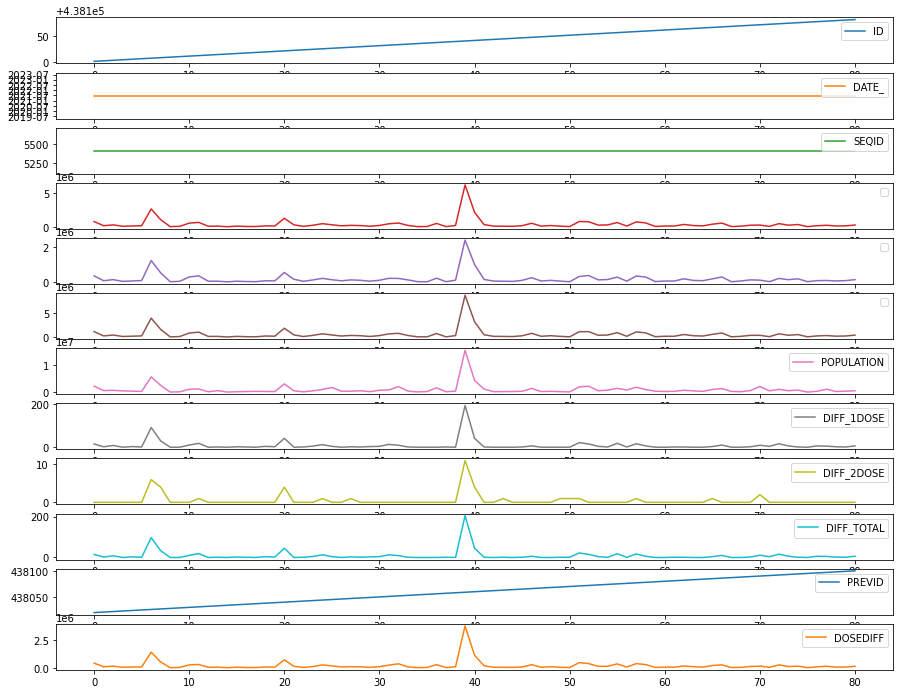

In [114]:
df.plot(subplots= True, figsize=(15, 12), sharex= False, sharey=False)
plt.show()

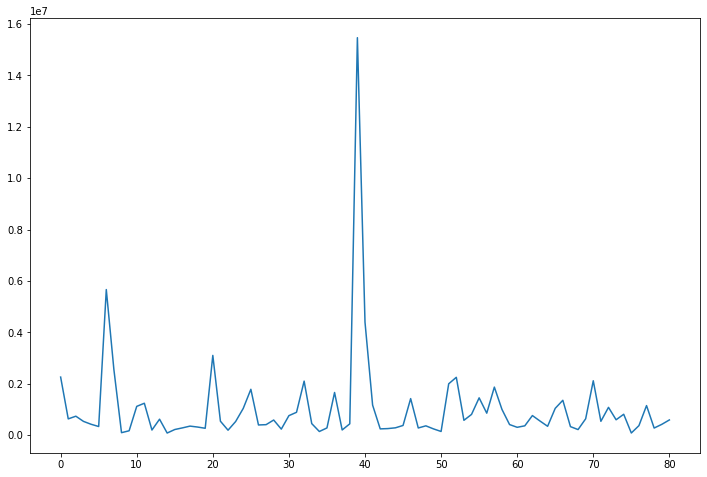

In [115]:
df.POPULATION.plot(figsize=(12, 8))
plt.show()

### Understanding GroupBy objects

In [116]:
df.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID,DOSEDIFF
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021,429060
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022,92892
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023,153677
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024,53661
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025,69286


In [117]:
df_slice = df.iloc[:10, [2,3]]

In [118]:
df_slice

,SEQID,CITY
0,5412,Adana
1,5412,Adıyaman
2,5412,Afyonkarahisar
3,5412,Ağrı
4,5412,Aksaray
5,5412,Amasya
6,5412,Ankara
7,5412,Antalya
8,5412,Ardahan
9,5412,Artvin


In [120]:
df_slice.groupby("CITY")

In [121]:
df.groupby("CITY")

In [122]:
gbc = df.groupby("CITY")

In [123]:
type(gbc)

pandas.core.groupby.generic.DataFrameGroupBy

In [124]:
gbc.groups

{'Adana': Int64Index([0], dtype='int64'),
 'Adıyaman': Int64Index([1], dtype='int64'),
 'Afyonkarahisar': Int64Index([2], dtype='int64'),
 'Aksaray': Int64Index([4], dtype='int64'),
 'Amasya': Int64Index([5], dtype='int64'),
 'Ankara': Int64Index([6], dtype='int64'),
 'Antalya': Int64Index([7], dtype='int64'),
 'Ardahan': Int64Index([8], dtype='int64'),
 'Artvin': Int64Index([9], dtype='int64'),
 'Aydın': Int64Index([10], dtype='int64'),
 'Ağrı': Int64Index([3], dtype='int64'),
 'Balıkesir': Int64Index([11], dtype='int64'),
 'Bartın': Int64Index([12], dtype='int64'),
 'Batman': Int64Index([13], dtype='int64'),
 'Bayburt': Int64Index([14], dtype='int64'),
 'Bilecik': Int64Index([15], dtype='int64'),
 'Bingöl': Int64Index([16], dtype='int64'),
 'Bitlis': Int64Index([17], dtype='int64'),
 'Bolu': Int64Index([18], dtype='int64'),
 'Burdur': Int64Index([19], dtype='int64'),
 'Bursa': Int64Index([20], dtype='int64'),
 'Denizli': Int64Index([24], dtype='int64'),
 'Diyarbakır': Int64Index([25]

In [125]:
l = list(gbc)

In [126]:
l

[('Adana',
         ID               DATE_  SEQID   CITY  CITY2  _1DOSE  _2DOSE   _TOTAL  \
  0  438102 2021-06-26 22:41:31   5412  Adana  Adana  784464  355404  1139868   
  
     POPULATION  DIFF_1DOSE  DIFF_2DOSE  DIFF_TOTAL  PREVID  DOSEDIFF  
  0     2258718          15           0          15  438021    429060  ),
 ('Adıyaman',
         ID               DATE_  SEQID      CITY     CITY2  _1DOSE  _2DOSE  \
  1  438103 2021-06-26 22:41:31   5412  Adıyaman  Adiyaman  170847   77955   
  
     _TOTAL  POPULATION  DIFF_1DOSE  DIFF_2DOSE  DIFF_TOTAL  PREVID  DOSEDIFF  
  1  248802      632459           2           0           2  438022     92892  ),
 ('Afyonkarahisar',
         ID               DATE_  SEQID            CITY  CITY2  _1DOSE  _2DOSE  \
  2  438104 2021-06-26 22:41:31   5412  Afyonkarahisar  Afyon  292611  138934   
  
     _TOTAL  POPULATION  DIFF_1DOSE  DIFF_2DOSE  DIFF_TOTAL  PREVID  DOSEDIFF  
  2  431545      736912           8           0           8  438023    153677 

In [127]:
type(l[0][1])

pandas.core.frame.DataFrame

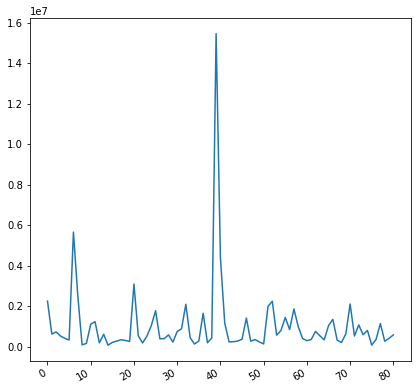

In [130]:
df.POPULATION.plot(figsize = (15, 7), subplots=True, layout=(1, 2), sharey=True)
plt.show()